In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Dataset URL: https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/latest_data/latestdata.csv

In [3]:
#d = pd.read_csv("https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/latest_data/latestdata.csv")

In [4]:
train = pd.read_csv("covid2train.csv", index_col = 0)

In [5]:
def clean(train):
    features = ['age', 'sex', 'country', 'chronic_disease_binary', 'que_paso']
    xtrain = train[features]

# Dropping NA's from only 'sex' + 'country'    
    subset = xtrain.dropna(subset = ['age','sex','country'])
    countries = xtrain['country'].drop_duplicates().dropna()

# Replacing the age ranges with their means    
    mp = {'20-29': np.mean([20,29]), '40-49': np.mean([40,49]),'50-59': np.mean([50,59]),
          '60-69': np.mean([60,69]), '70-79': np.mean([70,79]),
          '80-89': np.mean([80,89]),'90-99': np.mean([90,99]), '80-': 80}
    
# Dictionary replacing countries with numerical values
    mp2 = {}
    key = np.arange(len(countries) + 1)
    for i,j in zip(countries,key):
        val = {i:j}
        mp2.update(val)
        
    mp3 = {'male': 0, 'female': 1}
        
# Updating the training data with new values
    subset = subset.replace(mp).replace(mp2)
    subset = subset.replace(mp3)
    subset['chronic_disease_binary'] = subset['chronic_disease_binary']*1
    subset['age'] = subset['age'].astype(float)
    xtrain = subset.drop('que_paso', axis = 1)
    ytrain = subset['que_paso']
    return xtrain, ytrain

In [6]:
xtrain, ytrain = clean(train)
xtrain['outcome'] = ytrain
all_ds = xtrain

In [39]:
d = all_ds['outcome'] == 0
r= all_ds['outcome'] == 1
c= all_ds['outcome'] == 2

In [40]:
#Sex Information
m = all_ds['sex'] == 0
f = all_ds['sex'] == 1

count_s = all_ds['sex'].value_counts()
m_t = count_s[0]
f_t = count_s[1]

m_d = (len(all_ds[m & d])/m_t)*100
f_d = (len(all_ds[f & d])/f_t)*100
m_r = (len(all_ds[m & r])/m_t)*100
f_r = (len(all_ds[f & r])/f_t)*100
m_c = (len(all_ds[m & c])/m_t)*100
f_c = (len(all_ds[f & c])/f_t)*100

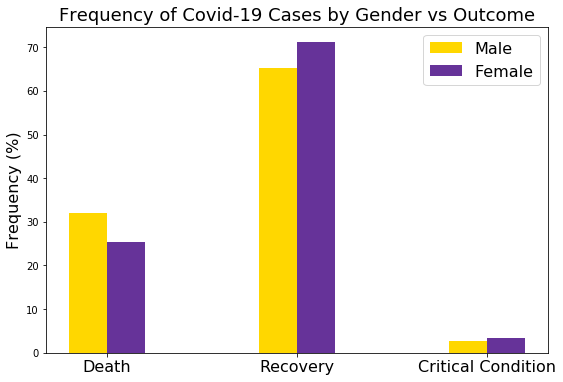

In [100]:
#Freq Sex vs Outcome Plot
labels = ['Death', 'Recovery', 'Critical Condition']

M = [m_d,m_r,m_c]
F = [f_d,f_r,f_c]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize = (9,6))
rects1 = ax.bar(x - .5*width, M, width, label='Male', color = 'gold')
rects2 = ax.bar(x + .5*width, F, width, label='Female', color = 'rebeccapurple')

ax.set_ylabel('Frequency (%)', fontsize=16)
ax.set_title('Frequency of Covid-19 Cases by Gender vs Outcome', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend(loc='best', fontsize=16)

plt.show()


In [96]:
#Chronic Disease
n_ch = all_ds['chronic_disease_binary'] == 0
ch = all_ds['chronic_disease_binary'] == 1

count_ch = all_ds['chronic_disease_binary'].value_counts()
n_ch_t = count_ch[0]
ch_t = count_ch[1]

n_ch_d = (len(all_ds[n_ch & d])/m_t)*100
ch_d = (len(all_ds[ch & d])/f_t)*100
n_ch_r = (len(all_ds[n_ch & r])/m_t)*100
ch_r = (len(all_ds[ch & r])/f_t)*100
n_ch_c = (len(all_ds[n_ch & c])/m_t)*100
ch_c = (len(all_ds[ch & c])/f_t)*100

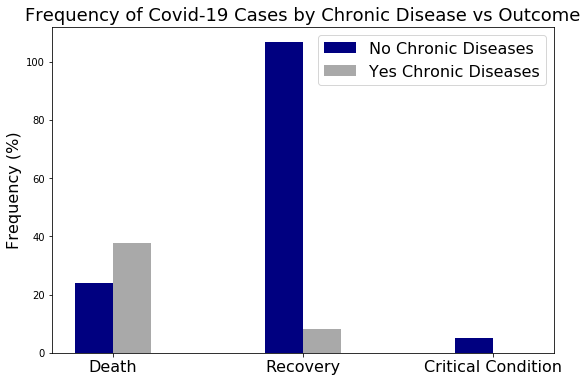

In [102]:
#Freq Sex vs Outcome Plot
labels = ['Death', 'Recovery', 'Critical Condition']

N_CH = [n_ch_d,n_ch_r,n_ch_c]
CH = [ch_d,ch_r,ch_c]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize = (9,6))
rects1 = ax.bar(x - .5*width, N_CH, width, label='No Chronic Diseases', color = 'navy')
rects2 = ax.bar(x + .5*width, CH, width, label='Yes Chronic Diseases', color = 'darkgrey')

ax.set_ylabel('Frequency (%)', fontsize=16)
ax.set_title('Frequency of Covid-19 Cases by Chronic Disease vs Outcome', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend(loc='best', fontsize=16)


plt.show()

In [103]:
#Country Information
China = all_ds['country'] == 0
Italy = all_ds['country'] == 1
US = all_ds['country'] == 15
Vietnam = all_ds['country'] == 19

count_c = all_ds['country'].value_counts()
China_t = count_c[0]
Italy_t = count_c[1]
US_t = count_c[15]
Vietnam_t = count_c[19]

#death
China_d = (len(all_ds[China & d])/China_t)*100
Italy_d = (len(all_ds[Italy & d])/Italy_t)*100
US_d = (len(all_ds[US & d])/US_t)*100
Vietnam_d = (len(all_ds[Vietnam & d])/Vietnam_t)*100

#recovery
China_r = (len(all_ds[China & r])/China_t)*100
Italy_r = (len(all_ds[Italy & r])/Italy_t)*100
US_r = (len(all_ds[US & r])/US_t)*100
Vietnam_r = (len(all_ds[Vietnam & r])/Vietnam_t)*100

#critical
China_c = (len(all_ds[China & c])/China_t)*100
Italy_c = (len(all_ds[Italy & c])/Italy_t)*100
US_c = (len(all_ds[US & c])/US_t)*100
Vietnam_c = (len(all_ds[Vietnam & c])/Vietnam_t)*100

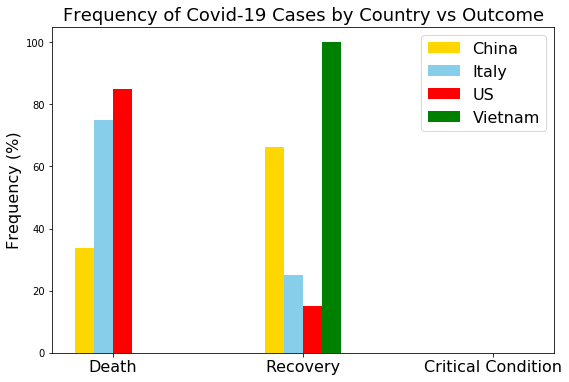

<Figure size 360x360 with 0 Axes>

In [105]:
#Freq Sex vs Outcome Plot
labels = ['Death', 'Recovery', 'Critical Condition']

CH = [China_d,China_r,China_c]
IT = [Italy_d,Italy_r,Italy_c]
US = [US_d,US_r,US_c]
VI = [Vietnam_d,Vietnam_r,Vietnam_c]

x = np.arange(len(labels))
width = 0.1

fig, ax = plt.subplots(figsize = (9,6))
rects1 = ax.bar(x - 1.5*width, CH, width, label='China', color = 'gold')
rects2 = ax.bar(x - .5*width, IT, width, label='Italy', color = 'skyblue')
rects2 = ax.bar(x + .5*width, US, width, label='US', color = 'red')
rects1 = ax.bar(x + 1.5*width, VI, width, label='Vietnam', color = 'green')

ax.set_ylabel('Frequency (%)', fontsize=16)
ax.set_title('Frequency of Covid-19 Cases by Country vs Outcome', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend(loc='best', fontsize=16)

#fig.tight_layout()
fig = plt.figure(figsize = (5,5))

plt.show()

In [58]:
#print(all_ds)
pd.set_option('display.max_rows', all_ds.shape[0]+1)
#all_ds
count_o = all_ds['outcome'].value_counts()
count_o

1    455
0    198
2     20
Name: outcome, dtype: int64